# HM4, Clustering and PCA

## Load Data Set

In [31]:
import matplotlib.pyplot as plt
from sklearn import metrics, datasets, tree
from sklearn.model_selection import train_test_split

# 1. load 	
data = datasets.load_breast_cancer()
X,y= data.data, data.target


### k-Means

In [32]:
from sklearn import datasets, metrics, cluster, mixture

# parameterize clustering
kmeans_algo = cluster.KMeans(n_clusters=2,algorithm='lloyd',init='random',n_init=1)

# learn the model
kmeans_model = kmeans_algo.fit(X)

# return centroids
kmeans_model.cluster_centers_
labels = kmeans_model.labels_

In [33]:
print("means:\n",kmeans_model.cluster_centers_)

means:
 [[1.93799237e+01 2.16945802e+01 1.28231298e+02 1.18592977e+03
  1.01294580e-01 1.48612977e-01 1.76939466e-01 1.00698779e-01
  1.91539695e-01 6.06029008e-02 7.42803817e-01 1.22253817e+00
  5.25058015e+00 9.56781679e+01 6.59868702e-03 3.21766947e-02
  4.24197710e-02 1.56739847e-02 2.03039695e-02 3.95338931e-03
  2.37094656e+01 2.89126718e+01 1.58496183e+02 1.75302290e+03
  1.40424733e-01 3.57757710e-01 4.49306107e-01 1.92431069e-01
  3.11881679e-01 8.61654962e-02]
 [1.25562991e+01 1.85703653e+01 8.11234703e+01 4.96061872e+02
  9.48844977e-02 9.10998174e-02 6.24377642e-02 3.34325434e-02
  1.78057991e-01 6.34540183e-02 3.04190868e-01 1.21515320e+00
  2.15288059e+00 2.37852922e+01 7.17326256e-03 2.34746895e-02
  2.87455128e-02 1.06363242e-02 2.06135799e-02 3.74750297e-03
  1.40439018e+01 2.47095434e+01 9.19375114e+01 6.19647945e+02
  1.29959110e-01 2.23311758e-01 2.19214947e-01 9.13298425e-02
  2.83553653e-01 8.32819406e-02]]


### Evaluation

In [34]:
# compute silhouette
print("Silhouette:",metrics.silhouette_score(X, labels, metric='euclidean'))

Silhouette: 0.6972646156059464


If the ground truth labels are not known, the Davies-Bouldin index (sklearn.metrics.davies_bouldin_score) can be used to evaluate the model, where a lower Davies-Bouldin index relates to a model with better separation between the clusters.

This index signifies the average ‘similarity’ between clusters, where the similarity is a measure that compares the distance between clusters with the size of the clusters themselves.

Zero is the lowest possible score. Values closer to zero indicate a better partition.



In [35]:
from sklearn.metrics import davies_bouldin_score
print("Davies Bouldin:",davies_bouldin_score(X, labels))

Davies Bouldin: 0.5044035685410985


## EM Clustering

In [36]:
from sklearn.mixture import GaussianMixture

# learn EM with multivariate Gaussian assumption
em_algo = GaussianMixture(n_components=2, covariance_type='full',n_init=1) 
em_model = em_algo.fit(X)

# describe EM solution
print("means:\n",em_model.means_,"\n\ncovariances:\n",em_model.covariances_)

means:
 [[1.75957085e+01 2.13689346e+01 1.16319305e+02 9.91637145e+02
  1.02876168e-01 1.48130748e-01 1.63244155e-01 8.91394718e-02
  1.93444157e-01 6.29365440e-02 6.09821615e-01 1.17722062e+00
  4.34906577e+00 7.33021385e+01 6.58953275e-03 3.30124849e-02
  4.20461896e-02 1.49219947e-02 2.05045237e-02 4.13057753e-03
  2.13255680e+01 2.89627155e+01 1.42852023e+02 1.44387232e+03
  1.44874555e-01 3.86279506e-01 4.60861434e-01 1.84626613e-01
  3.26149713e-01 9.27148016e-02]
 [1.21625159e+01 1.81117822e+01 7.81751817e+01 4.64129320e+02
  9.26691857e-02 7.95351210e-02 4.66280790e-02 2.61352846e-02
  1.74204234e-01 6.27189069e-02 2.89242932e-01 1.23930447e+00
  2.02597117e+00 2.16631543e+01 7.29671246e-03 2.12101104e-02
  2.61425809e-02 1.00254128e-02 2.05636974e-02 3.60475269e-03
  1.34048714e+01 2.38160697e+01 8.70998624e+01 5.61493156e+02
  1.25284263e-01 1.79481980e-01 1.65309729e-01 7.49413320e-02
  2.69640425e-01 7.89783954e-02]] 

covariances:
 [[[ 9.95329424e+00  1.67185697e+00  6.729

In [37]:
prob=em_model.predict_proba(X)
prob[5]

array([1.0000000e+00, 3.3702397e-17])

## Evaluation

In [38]:
labels_em= em_model.predict(X)
print("Silhouette:",metrics.silhouette_score(X, labels_em, metric='euclidean'))
print("Davies Bouldin:",davies_bouldin_score(X, labels_em))

Silhouette: 0.5315172918032405
Davies Bouldin: 0.7014259334672106


## PCA

In [39]:
from sklearn.decomposition import PCA

# learn the transformation (components as linear combination of features)
pca = PCA(n_components=2)
X_pca = pca.fit(X).transform(X)
print("Components:\n",pca.components_)


Components:
 [[ 5.08623202e-03  2.19657026e-03  3.50763298e-02  5.16826469e-01
   4.23694535e-06  4.05260047e-05  8.19399539e-05  4.77807775e-05
   7.07804332e-06 -2.62155251e-06  3.13742507e-04 -6.50984008e-05
   2.23634150e-03  5.57271669e-02 -8.05646029e-07  5.51918197e-06
   8.87094462e-06  3.27915009e-06 -1.24101836e-06 -8.54530832e-08
   7.15473257e-03  3.06736622e-03  4.94576447e-02  8.52063392e-01
   6.42005481e-06  1.01275937e-04  1.68928625e-04  7.36658178e-05
   1.78986262e-05  1.61356159e-06]
 [ 9.28705650e-03 -2.88160658e-03  6.27480827e-02  8.51823720e-01
  -1.48194356e-05 -2.68862249e-06  7.51419574e-05  4.63501038e-05
  -2.52430431e-05 -1.61197148e-05 -5.38692831e-05  3.48370414e-04
   8.19640791e-04  7.51112451e-03  1.49438131e-06  1.27357957e-05
   2.86921009e-05  9.36007477e-06  1.22647432e-05  2.89683790e-07
  -5.68673345e-04 -1.32152605e-02 -1.85961117e-04 -5.19742358e-01
  -7.68565692e-05 -2.56104144e-04 -1.75471479e-04 -3.05051743e-05
  -1.57042845e-04 -5.5307166

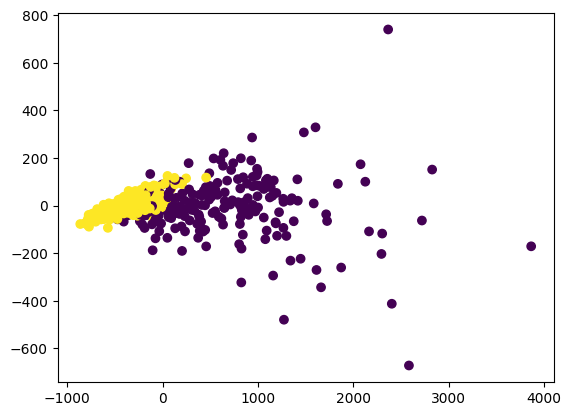

In [40]:
plt.scatter(X_pca[:,0], X_pca[:,1],c=y)
plt.show()

## k Means

In [41]:
X_pca = pca.transform(X)


# learn the model
kmeans_model = kmeans_algo.fit(X_pca)

# return centroids
kmeans_model.cluster_centers_
labels = kmeans_model.labels_


In [42]:
print("means:\n",kmeans_model.cluster_centers_)

means:
 [[-3.06510219e+02 -4.74773896e-01]
 [ 1.02482043e+03  1.58741196e+00]]


In [43]:
# compute silhouette
print("Silhouette:",metrics.silhouette_score(X_pca, labels, metric='euclidean'))

Silhouette: 0.6984195775999954


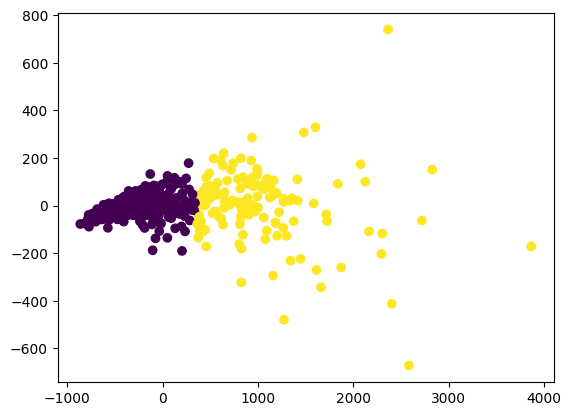

In [44]:

plt.scatter(X_pca[:,0], X_pca[:,1],c=labels)
plt.show()


## EM Clustering

Silhouette: 0.5865823748565954


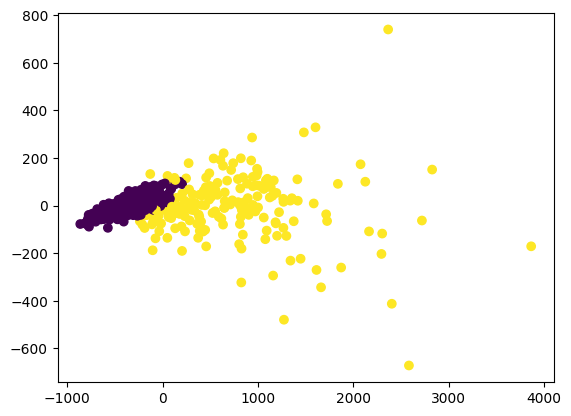

In [45]:
em_model = em_algo.fit(X_pca)
labels_em= em_model.predict(X_pca)
# compute silhouette
print("Silhouette:",metrics.silhouette_score(X_pca, labels_em, metric='euclidean'))

plt.scatter(X_pca[:,0], X_pca[:,1],c=labels_em)
plt.show()